In [1]:
import numpy
from etrade.spot.forecast.plan_a.simulator2 import WeightGaussianMarketSimulator
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast.yieldindex import zero_quantile
from etrade.spot.forecast import yieldindex
from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution, eps
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.kernel2 import KernelMixDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps, quantile_RMSE, js_divergence_continuous

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

from matplotlib import pyplot
import json

In [2]:
init_kwargs = {
    "aq_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 50), (1, 10), (1, 3)),
    "dp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 3)),
    "rp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 3)),
    "aq_range": (0, 50),
    "dp_range": (0, 1e+6),
    "rp_range": (0, 1e+6),
    # "real_market": 1000,
    # "noise_weight": 0,
    "market_len": 1,
    # "kernel_num": None
    "noise_weight": numpy.full((3,4), 0.0)
}
s = Station("station", 50)
br = PointwiseRecycle(0.5, 1.05)

In [3]:
ms = WeightGaussianMarketSimulator(**init_kwargs)

In [4]:
ms.noise_weight

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

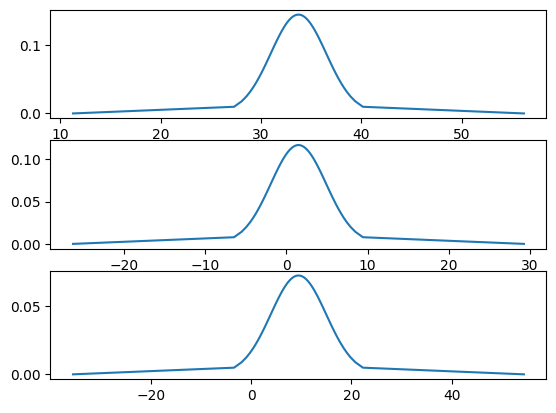

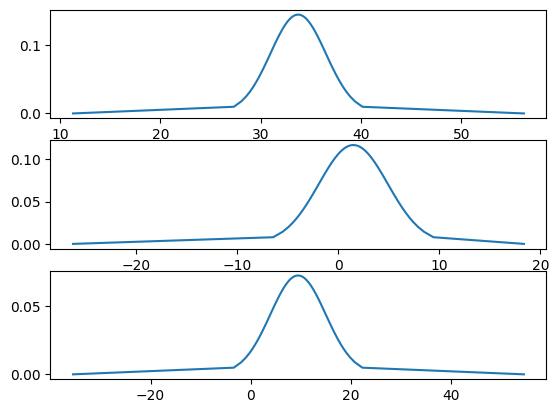

In [5]:
ms.real_market.plot()
ms.predicted_market.plot()

In [6]:
print(ms.real_market.curve_matrix().tolist())

[30.189680929961735, 31.293232875046634, 32.101226611210045, 32.78828847976681, 33.4209421252563, 34.03762063293915, 34.67027427842864, 35.35733614698541, 36.16532988314882, 37.268881828233724, -2.8796112574306374, -1.5155341489656733, -0.5167902618360143, 0.3324723135884241, 1.1144820406726608, 1.8767452393912243, 2.6587549664754597, 3.5080175418998976, 4.506761429029556, 5.870838537494523, 2.3702864548326184, 4.580114855494811, 6.1980971477499285, 7.5739171414630215, 8.840786362990773, 10.075665868595463, 11.342535090123214, 12.718355083836306, 14.336337376091425, 16.546165776753615]


In [7]:
print(ms.historical_observe(s, br).tolist())

[1.1201264411074103, 3.2375358108023864, 1.3364883639410277, 0.06353923522548217, 0.09789635716114987, 0.12140828696027724, 0.13630020803867687, 0.14354798119594098, 0.14354794158384523, 0.13630041854218736, 0.12140977623554569, 0.09789740080457626, 0.06353895519069981, 0.05140618437290515, 0.07920036214579221, 0.09822171740205021, 0.11026873056664328, 0.11613174001720221, 0.11613174068810868, 0.11026866407416257, 0.09822154545158572, 0.0792003001301319, 0.0514065995175989, 0.03173111941637571, 0.04888808784233078, 0.06062936813690234, 0.06806599423002417, 0.07168548030377046, 0.0716854821507107, 0.06806636200581448, 0.06062920590715711, 0.0488876704431816, 0.03172973852852808, -7.104684979098321, 9.012786223468957, 26.2025496022117, 37.295017800468436, 48.896237262157825, 62.30197927384114, 74.21594805874675, 86.50520877595392, 106.73529402867055, 5.100448459888939, 3.2963269640830637, 1.2109532752406904, 0.030687971026585197, 0.04215068411282185, 0.04595844740466691, 0.04579693373679